In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %inline matplotlib
os.chdir(r"C:\Users\MANDY\Desktop\dataset")

In [2]:
df = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])

In [3]:
df.shape

(80, 2)

In [4]:
df.drop('id', axis = 1, inplace= True)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.head(20)

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70
2019-03-19 00:00:50,302.08
2019-03-19 00:01:00,152.25
2019-03-19 00:01:10,41.19
2019-03-19 00:01:20,34.61


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Data columns (total 1 columns):
feature    80 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


C:\Users\MANDY\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


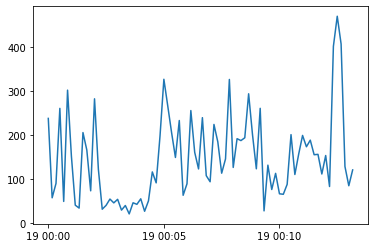

In [8]:
plt.plot(df)

In [9]:
df.shape

(80, 1)

In [20]:
df.corr()

,feature
feature,1.0


In [11]:
y_pred = df['feature']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Data columns (total 1 columns):
feature    80 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


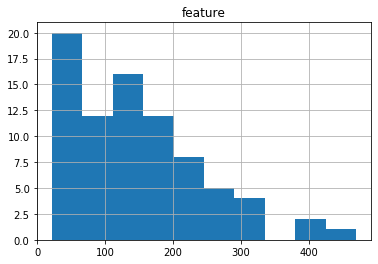

In [13]:
df.hist('feature')
plt.show()

In [19]:
# derbin watson test
from statsmodels.regression.linear_model import OLS
import numpy as np
from statsmodels.stats.stattools import durbin_watson



def dw(df):
    ols_res = OLS(df, np.ones(len(df))).fit()
    return durbin_watson(ols_res.resid)


print("dw of range=%f" % dw(np.arange(80)))
print("dw of rand=%f" % dw(np.random.randn(80)))

dw of range=0.001852
dw of rand=2.075279


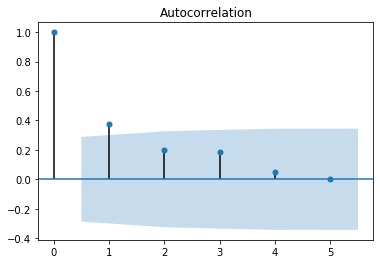

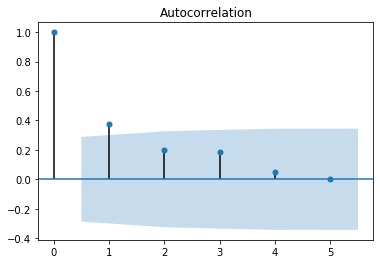

In [15]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['feature'],lags = 5,alpha = 0.01)

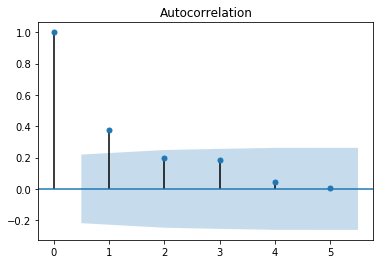

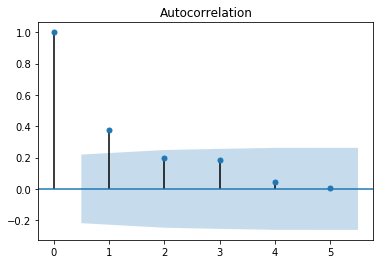

In [15]:
plot_acf(df['feature'],lags = 5,alpha =0.05)

In [16]:
from statsmodels.tsa.stattools import acf
print(acf(df['feature']))

[ 1.00000000e+00  3.75443138e-01  1.97109727e-01  1.82187504e-01
  4.63897236e-02  4.05973608e-03  1.12324294e-01  1.15031948e-01
  1.42440545e-02  1.80584552e-02  7.20269438e-03 -9.11328806e-02
 -4.73534967e-02 -4.53617510e-02 -1.41049024e-01 -9.09972559e-02
 -1.13361602e-01 -2.34832276e-02 -3.53360047e-02 -2.13724210e-02
  1.11895729e-02  6.28009103e-02  4.14780061e-02 -8.80416198e-04
 -3.36974141e-03  4.19690104e-02 -1.18292225e-01 -4.45623210e-02
 -3.50677728e-03 -7.47953622e-02 -1.71607750e-01 -1.78480016e-02
 -3.23008947e-02 -9.70619127e-02  3.96323763e-02  6.93676822e-02
 -3.07857473e-02  1.06577129e-01  9.46347760e-02 -2.89932252e-02
  2.58192764e-02]


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [17]:
# df.info()
# df.time = pd.to_datetime(df.time)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Data columns (total 1 columns):
feature    80 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


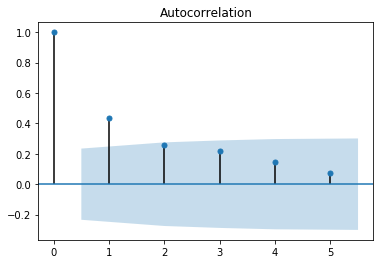

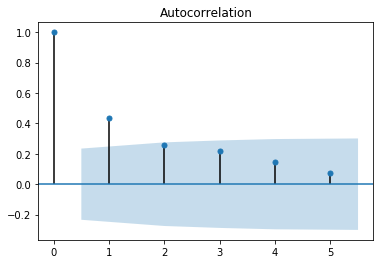

In [19]:
data_df = df.diff(10)
data_df = data_df.dropna()


#plot Acf
plot_acf(data_df, lags = 5)

<Figure size 432x288 with 0 Axes>

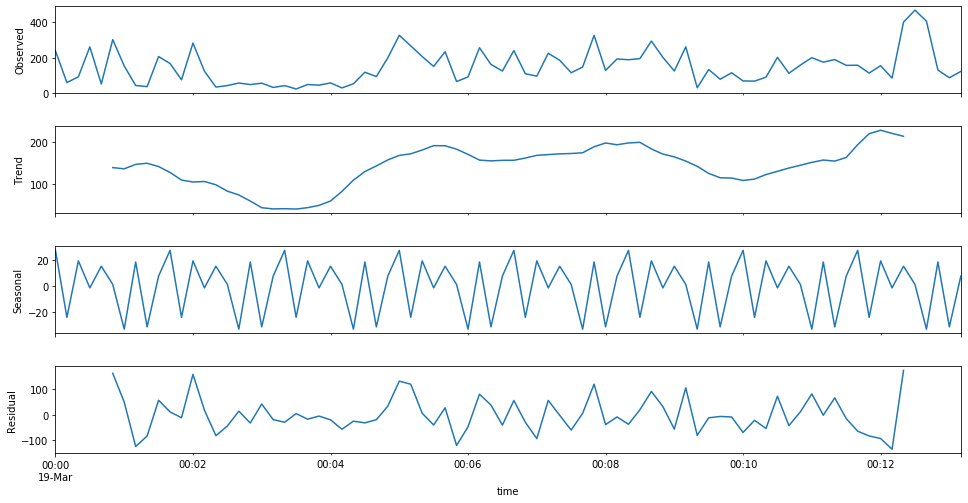

In [20]:
# ucm
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["feature"], freq=10)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [31]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 5),
 (0, 0, 1, 5),
 (0, 1, 0, 5),
 (0, 1, 1, 5),
 (1, 0, 0, 5),
 (1, 0, 1, 5),
 (1, 1, 0, 5),
 (1, 1, 1, 5)]

In [32]:
import statsmodels.api as sm  
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df["feature"].astype(float),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 5)4 - AIC:1042.4035372531396
ARIMA(0, 0, 0)x(0, 0, 1, 5)4 - AIC:953.3029807804089
ARIMA(0, 0, 0)x(0, 1, 0, 5)4 - AIC:932.5971718689922
ARIMA(0, 0, 0)x(0, 1, 1, 5)4 - AIC:841.6057652521546
ARIMA(0, 0, 0)x(1, 0, 0, 5)4 - AIC:939.2315828753866


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 5)4 - AIC:903.9485132432783
ARIMA(0, 0, 0)x(1, 1, 0, 5)4 - AIC:865.0327244474685


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 5)4 - AIC:843.6036320720646
ARIMA(0, 0, 1)x(0, 0, 0, 5)4 - AIC:988.1740013827833


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 5)4 - AIC:912.2325152132393
ARIMA(0, 0, 1)x(0, 1, 0, 5)4 - AIC:917.9825274709882


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 5)4 - AIC:817.9441853873241
ARIMA(0, 0, 1)x(1, 0, 0, 5)4 - AIC:928.4501481597442


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 5)4 - AIC:885.759694710921
ARIMA(0, 0, 1)x(1, 1, 0, 5)4 - AIC:854.845332423233


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 5)4 - AIC:817.4360591335426
ARIMA(0, 1, 0)x(0, 0, 0, 5)4 - AIC:951.5451699616596
ARIMA(0, 1, 0)x(0, 0, 1, 5)4 - AIC:881.1413003732843
ARIMA(0, 1, 0)x(0, 1, 0, 5)4 - AIC:949.2096056547446


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 5)4 - AIC:834.4276323447185
ARIMA(0, 1, 0)x(1, 0, 0, 5)4 - AIC:893.9043191502917
ARIMA(0, 1, 0)x(1, 0, 1, 5)4 - AIC:880.8228791195694
ARIMA(0, 1, 0)x(1, 1, 0, 5)4 - AIC:859.7691484044011

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 0)x(1, 1, 1, 5)4 - AIC:830.4691861965456


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 5)4 - AIC:922.9270370031691
ARIMA(0, 1, 1)x(0, 0, 1, 5)4 - AIC:855.7496955228467


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 5)4 - AIC:913.9968239587844
ARIMA(0, 1, 1)x(0, 1, 1, 5)4 - AIC:809.1253042300345


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 5)4 - AIC:882.2707589474661
ARIMA(0, 1, 1)x(1, 0, 1, 5)4 - AIC:857.2939238125851


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 5)4 - AIC:851.1968751612591


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 5)4 - AIC:808.4239757364949
ARIMA(1, 0, 0)x(0, 0, 0, 5)4 - AIC:959.0922663490547
ARIMA(1, 0, 0)x(0, 0, 1, 5)4 - AIC:890.1571211512871

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)



ARIMA(1, 0, 0)x(0, 1, 0, 5)4 - AIC:930.1498372484882
ARIMA(1, 0, 0)x(0, 1, 1, 5)4 - AIC:826.6963609308843


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 5)4 - AIC:889.7131871190253


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 5)4 - AIC:896.0005962714943
ARIMA(1, 0, 0)x(1, 1, 0, 5)4 - AIC:839.8363781759971


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 5)4 - AIC:826.1869881140041
ARIMA(1, 0, 1)x(0, 0, 0, 5)4 - AIC:936.0091469398241


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 5)4 - AIC:869.8717915411424
ARIMA(1, 0, 1)x(0, 1, 0, 5)4 - AIC:919.9745495396463


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 5)4 - AIC:816.7506652873369
ARIMA(1, 0, 1)x(1, 0, 0, 5)4 - AIC:885.4716922148243


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 5)4 - AIC:871.2235244045855
ARIMA(1, 0, 1)x(1, 1, 0, 5)4 - AIC:841.7985912091066


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 5)4 - AIC:816.2833680641929
ARIMA(1, 1, 0)x(0, 0, 0, 5)4 - AIC:943.3243763059057
ARIMA(1, 1, 0)x(0, 0, 1, 5)4 - AIC:877.0885033712945
ARIMA(1, 1, 0)x(0, 1, 0, 5)4 - AIC:941.839829311907


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 5)4 - AIC:830.8102323593881
ARIMA(1, 1, 0)x(1, 0, 0, 5)4 - AIC:875.9708761480699


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 5)4 - AIC:877.9016124291321
ARIMA(1, 1, 0)x(1, 1, 0, 5)4 - AIC:843.9708726135694


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 5)4 - AIC:830.4435133671687
ARIMA(1, 1, 1)x(0, 0, 0, 5)4 - AIC:920.0437195270665


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 5)4 - AIC:854.2891107608298
ARIMA(1, 1, 1)x(0, 1, 0, 5)4 - AIC:911.4380691025441


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 5)4 - AIC:804.8514744444495
ARIMA(1, 1, 1)x(1, 0, 0, 5)4 - AIC:865.367518786974

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 5)4 - AIC:855.8486369443383


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 5)4 - AIC:833.841759560439


C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 5)4 - AIC:805.0181691588355


In [ ]:
ARIMA(1, 1, 1)x(1, 1, 1, 4)4
ARIMA(1, 1, 1)x(0, 1, 1, 5)4 - AIC:804.8514744444495

In [ ]:
## seasonal differencing

In [33]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order = (1,1,1))

output = model.fit()
print(output.summary())

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.feature   No. Observations:                   79
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -467.920
Method:                       css-mle   S.D. of innovations             88.305
Date:                Sun, 26 Apr 2020   AIC                            943.839
Time:                        21:14:53   BIC                            953.317
Sample:                    03-19-2019   HQIC                           947.637
                         - 03-19-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0284      0.637      1.613      0.111      -0.221       2.278
ar.L1.D.feature     0.3403      0.109      3.121      0.003       0.127       0.554
ma.L1.D.feature    -1.0000      

In [39]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df,
                               order = (1,1,1),
                               seasonal_order = (0,1,1,5),enforce_stationarity = False, enforce_invertibility=False)
output_sarima = model.fit()
print(output.summary())

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.feature   No. Observations:                   79
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -467.920
Method:                       css-mle   S.D. of innovations             88.305
Date:                Sun, 26 Apr 2020   AIC                            943.839
Time:                        21:17:14   BIC                            953.317
Sample:                    03-19-2019   HQIC                           947.637
                         - 03-19-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0284      0.637      1.613      0.111      -0.221       2.278
ar.L1.D.feature     0.3403      0.109      3.121      0.003       0.127       0.554
ma.L1.D.feature    -1.0000      

In [40]:
df1 = pd.read_csv("test_csv (1).csv",index_col=['time'], parse_dates=['time'])
df1.index = pd.to_datetime(df1.index)

In [41]:
df1.index = pd.to_datetime(df1.index)
df1.head()

,id
time,
2019-03-19 00:13:20,80
2019-03-19 00:13:30,81
2019-03-19 00:13:40,82
2019-03-19 00:13:50,83
2019-03-19 00:14:00,84


In [1]:
# for RMSE score we getting it
yhat1= m.predict(start = '2019-03-19 00:00:10',end='2019-03-19 00:13:10')
yhat1

NameError: name 'm' is not defined

In [43]:
yhat = output.predict(start = '2019-03-19 00:00:10',end='2019-03-19 00:19:50')
yhat

2019-03-19 00:00:10     1.028393
2019-03-19 00:00:20    60.752108
2019-03-19 00:00:30    32.942336
2019-03-19 00:00:40   -51.388004
2019-03-19 00:00:50    62.045958
                         ...    
2019-03-19 00:19:10     1.028393
2019-03-19 00:19:20     1.028393
2019-03-19 00:19:30     1.028393
2019-03-19 00:19:40     1.028393
2019-03-19 00:19:50     1.028393
Freq: 10S, Length: 119, dtype: float64

In [44]:
type(yhat)

pandas.core.series.Series

In [45]:
index= range (0,40)
index

range(0, 40)

In [46]:
out = yhat['2019-03-19 00:13:20':]
out_df = pd.DataFrame(data = out)
# out_df.to_csv('deflag.csv')

In [47]:
out_df

,0
2019-03-19 00:13:20,45.900844
2019-03-19 00:13:30,16.299327
2019-03-19 00:13:40,6.225377
2019-03-19 00:13:50,2.797024
2019-03-19 00:14:00,1.630291
2019-03-19 00:14:10,1.233230
2019-03-19 00:14:20,1.098103
2019-03-19 00:14:30,1.052116
2019-03-19 00:14:40,1.036466
2019-03-19 00:14:50,1.031140


In [48]:
output.plot_diagnostics(figsize = (14,10))

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, yhat1))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [80, 79]

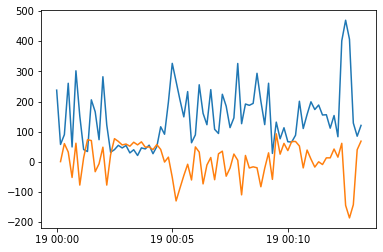

In [49]:
plt.plot(y_pred)
plt.plot(yhat1)

In [50]:
## RMSE without code
#Error = actual - predicted
import numpy as np
e = y_pred - yhat1
np.mean(e)

140.97471758258817

In [51]:
#Error^2
import math
e**2

#RMSE = sqrt(sum(e**2)/(ntest-1))
math.sqrt(sum(e**2)/(len(y_pred)-2))

nan

In [ ]:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %inline matplotlib
os.chdir(r"C:\Users\MANDY\Desktop\dataset")
data = pd.read_csv("train_csv (1).csv",index_col=['time'], parse_dates=['time'])
data.drop('id', axis = 1, inplace= True)
data.index = pd.to_datetime(data.index)

In [2]:
data.head(10)

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70
2019-03-19 00:00:50,302.08
2019-03-19 00:01:00,152.25
2019-03-19 00:01:10,41.19
2019-03-19 00:01:20,34.61


In [3]:
time = pd.date_range(start='1/1/2018', end='1/02/2018', freq='12s')
time
# source :-https://stackoverflow.com/questions/54660534/rolling-mean-with-time-offset-pandas

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:12',
               '2018-01-01 00:00:24', '2018-01-01 00:00:36',
               '2018-01-01 00:00:48', '2018-01-01 00:01:00',
               '2018-01-01 00:01:12', '2018-01-01 00:01:24',
               '2018-01-01 00:01:36', '2018-01-01 00:01:48',
               ...
               '2018-01-01 23:58:12', '2018-01-01 23:58:24',
               '2018-01-01 23:58:36', '2018-01-01 23:58:48',
               '2018-01-01 23:59:00', '2018-01-01 23:59:12',
               '2018-01-01 23:59:24', '2018-01-01 23:59:36',
               '2018-01-01 23:59:48', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', length=7201, freq='12S')

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = data.rolling('60s', min_periods=3).mean()
    rolstd = data.rolling('60s', min_periods=3).std()
#     rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [5]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data['feature'])

Results of Dickey-Fuller Test:
Test Statistic                -5.945866e+00
p-value                        2.205049e-07
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


C:\Users\MANDY\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


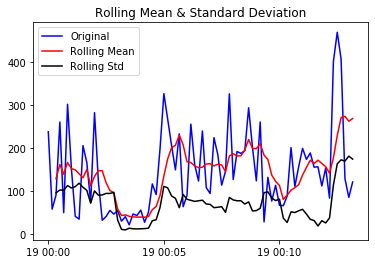

In [6]:
test_stationarity(data)

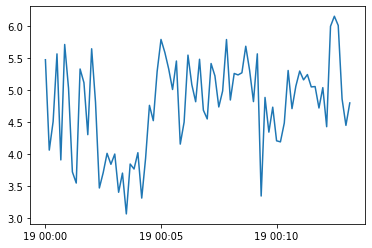

In [7]:
import numpy as np
ts_log = np.log(data)
plt.plot(ts_log)

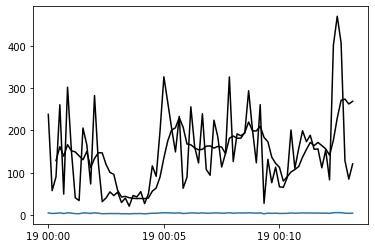

In [8]:
data['rolling_avg']=data.rolling('60s', min_periods=3).mean()
plt.plot(ts_log)
plt.plot(data, color='black')

In [9]:
ts_log_moving_avg_diff = ts_log - data
ts_log_moving_avg_diff.head(5)

,feature,rolling_avg
time,,
2019-03-19 00:00:00,-232.497855,NaN
2019-03-19 00:00:10,-53.870765,NaN
2019-03-19 00:00:20,-86.024319,NaN
2019-03-19 00:00:30,-255.186438,NaN
2019-03-19 00:00:40,-45.793995,NaN


In [10]:
ts_log_moving_avg_diff.head()

,feature,rolling_avg
time,,
2019-03-19 00:00:00,-232.497855,NaN
2019-03-19 00:00:10,-53.870765,NaN
2019-03-19 00:00:20,-86.024319,NaN
2019-03-19 00:00:30,-255.186438,NaN
2019-03-19 00:00:40,-45.793995,NaN


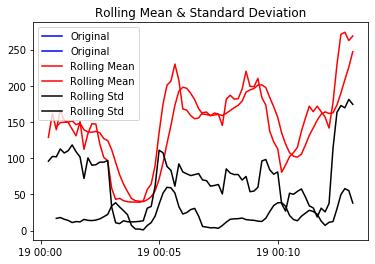

In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

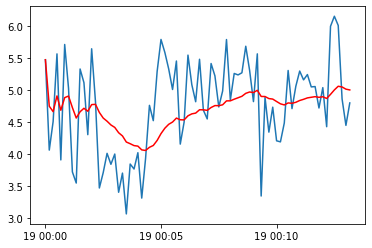

In [12]:
#here we will find exponential moving average
# expwighted_avg = pd.ewm(ts_log, halflife=12)
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2019-03-19 00:00:00 to 2019-03-19 00:13:10
Data columns (total 2 columns):
feature        80 non-null float64
rolling_avg    78 non-null float64
dtypes: float64(2)
memory usage: 1.9 KB


In [14]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
# adf_test(ts_log_diff)

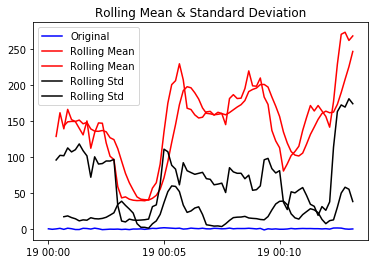

In [15]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

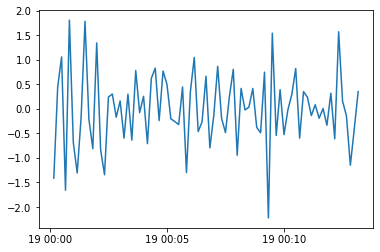

In [16]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

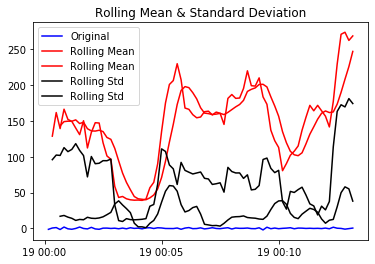

In [17]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [19]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


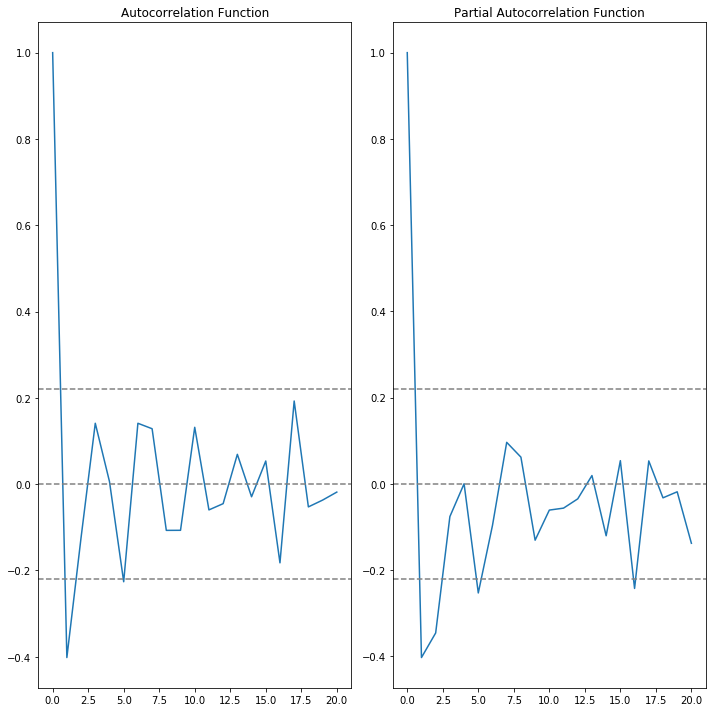

In [20]:
#Plot ACF:
plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ts_log.head()

In [22]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
C:\Users\MANDY\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


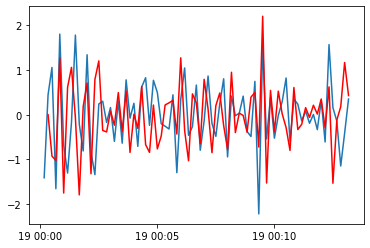

In [23]:
model = ARIMA(ts_log, order=(0 ,2 ,1)) 
# 0,2,1 works better
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [24]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:             D2.feature   No. Observations:                   78
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -92.779
Method:                       css-mle   S.D. of innovations              0.773
Date:                Mon, 27 Apr 2020   AIC                            191.557
Time:                        22:42:15   BIC                            198.627
Sample:                    03-19-2019   HQIC                           194.388
                         - 03-19-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0007      0.004      0.191      0.849      -0.007       0.008
ma.L1.D2.feature    -1.0000      0.032    -30.811      0.000      -1.064      -0.936
                            

In [25]:
results_AR.fittedvalues

time
2019-03-19 00:00:20    0.000728
2019-03-19 00:00:30   -0.928585
2019-03-19 00:00:40   -1.025952
2019-03-19 00:00:50    1.267843
2019-03-19 00:01:00   -1.754793
                         ...   
2019-03-19 00:12:30   -1.535689
2019-03-19 00:12:40   -0.120362
2019-03-19 00:12:50    0.178934
2019-03-19 00:13:00    1.169625
2019-03-19 00:13:10    0.428786
Length: 78, dtype: float64

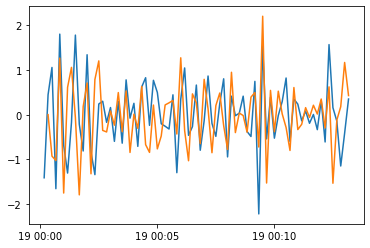

In [26]:
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues)

In [27]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

time
2019-03-19 00:00:20    0.000728
2019-03-19 00:00:30   -0.928585
2019-03-19 00:00:40   -1.025952
2019-03-19 00:00:50    1.267843
2019-03-19 00:01:00   -1.754793
dtype: float64

In [28]:
out = np.exp(predictions_ARIMA_diff)

In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

time
2019-03-19 00:00:20    0.000728
2019-03-19 00:00:30   -0.927857
2019-03-19 00:00:40   -1.953809
2019-03-19 00:00:50   -0.685966
2019-03-19 00:01:00   -2.440758
dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[1], index=ts_log.index[1:])
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [44]:
# for RMSE score we getting it
yhat1= results_AR.predict(start = '2019-03-19 00:00:00',end='2019-03-19 00:13:10')
yhat1

KeyError: '2019-03-19 00:00:00'